In [ ]:
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 
             'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv('diabetes.csv', header=None, names=col_names)
pima = pima[1:]

#Вывод датасета diabetes.csv

In [ ]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
Y = pima.label
X = pima.drop(['label'], axis=1)

#Проверка загрузки датасетов

In [ ]:
Y

1      1
2      0
3      1
4      0
5      1
      ..
764    0
765    0
766    0
767    1
768    0
Name: label, Length: 768, dtype: object

In [ ]:
X

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age
1,6,148,72,35,0,33.6,0.627,50
2,1,85,66,29,0,26.6,0.351,31
3,8,183,64,0,0,23.3,0.672,32
4,1,89,66,23,94,28.1,0.167,21
5,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
764,10,101,76,48,180,32.9,0.171,63
765,2,122,70,27,0,36.8,0.34,27
766,5,121,72,23,112,26.2,0.245,30
767,1,126,60,0,0,30.1,0.349,47


# Разделение выборки на тестовую и тренировочную части

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=True)

# Построение линейной регрессии (доп.1)

In [ ]:
from sklearn.linear_model import LogisticRegression
cls = LogisticRegression()

In [ ]:
cls.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
y_pred = cls.predict(x_test)

In [ ]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred)

array([[89, 10],
       [24, 31]])

Text(0.5, 15.0, 'Предсказанные значения')

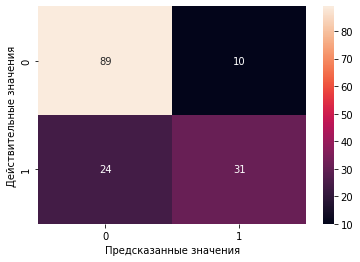

In [ ]:
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_pred)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

#Метрика достоверности предсказания

In [ ]:
metrics.accuracy_score(y_test, y_pred)

0.7792207792207793

#Метрика точности



In [ ]:
metrics.precision_score(y_test, y_pred, average='macro')

0.7718540902223181

#Метрика полноты

In [ ]:
collect_data = []
dt = metrics.recall_score(y_test, y_pred, average='macro')
collect_data.append(dt)
collect_data

[0.7313131313131314]

Доп задания

1 Используйте метод опорных векторов для построения альтернативной модели предсказания диабета.

Постройте модели классификации на основе следующих методов **метод опорных векторов с линейным ядром (SVC) **

#Метод опорных векторов с линейным ядром (SVC) 

In [ ]:
#Support Vector Machines — SVM
from sklearn import svm
model = svm.SVC(kernel='linear')
model.fit(x_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred2 = model.predict(x_test)

In [ ]:
# get number of support vectors for each class
model.n_support_

array([161, 160], dtype=int32)

In [ ]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred2)

array([[89, 10],
       [24, 31]])

Text(0.5, 15.0, 'Предсказанные значения')

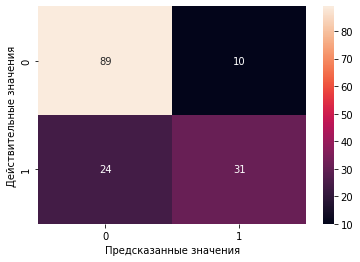

In [ ]:
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_pred2)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

2. Сравните метрики эффективности и сделайте вывод о том, какая модель лучше предсказывает заболевание.

In [ ]:
metrics.accuracy_score(y_test, y_pred2) #Метрика достоверности предсказания

0.7792207792207793

In [ ]:
metrics.precision_score(y_test, y_pred2, average='macro')

0.7718540902223181

In [ ]:

dt = metrics.recall_score(y_test, y_pred2, average='macro')
collect_data.append(dt)
dt

0.7313131313131314

3. Постройте модели классификации на основе следующих методов:

логистическая регрессия (LogisticRegression) и метод опорных векторов с линейным ядром (SVC) были построены раньше

#Метод опорных векторов с гауссовым ядром (SVC)


In [ ]:
#гауссовое ядро по дефолту
from sklearn import svm
model_svc = svm.SVC()
model_svc.fit(x_train, y_train)

SVC()

In [ ]:
y_pred3 = model_svc.predict(x_test)

In [ ]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred3)

array([[93,  6],
       [27, 28]])

Text(0.5, 15.0, 'Предсказанные значения')

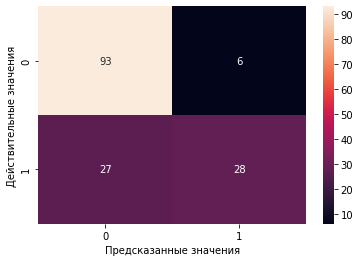

In [ ]:
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_pred3)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

In [ ]:
metrics.accuracy_score(y_test, y_pred3) #Метрика достоверности предсказания

0.7857142857142857

In [ ]:
metrics.precision_score(y_test, y_pred3, average='macro') #Метрика точности

0.799264705882353

In [ ]:
#Отзыв - это отношение, где - количество истинных положительных результатов и количество ложных отрицательных результатов
dt = metrics.recall_score(y_test, y_pred3, average='macro') #Метрика полноты
collect_data.append(dt)
dt

0.7242424242424242

#Метод k ближайших соседей (KNeighborsClassifier)**

In [ ]:
# k взяла = 5
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred4 = classifier.predict(x_test)

In [ ]:
metrics.confusion_matrix(y_test, y_pred4)

array([[82, 17],
       [24, 31]])

Text(0.5, 15.0, 'Предсказанные значения')

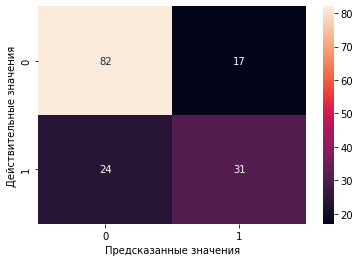

In [ ]:
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_pred4)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

In [ ]:
metrics.accuracy_score(y_test, y_pred4) 

0.7337662337662337

In [ ]:
metrics.precision_score(y_test, y_pred4, average='macro') 

0.7097091194968554

In [ ]:
dt = metrics.recall_score(y_test, y_pred4, average='macro')
collect_data.append(dt)
dt

0.6959595959595959

#Метод многослойный перцептрон (MLP);


In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier()
clf.fit(x_train, y_train)

MLPClassifier()

In [ ]:
y_pred5 = clf.predict(x_test)

In [ ]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred5)

array([[69, 30],
       [22, 33]])

Text(0.5, 15.0, 'Предсказанные значения')

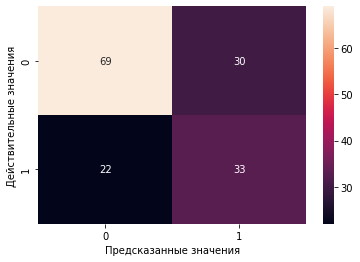

In [ ]:
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_pred5)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

In [ ]:
metrics.accuracy_score(y_test, y_pred5)

0.6623376623376623

In [ ]:
metrics.precision_score(y_test, y_pred5, average='macro')

0.641025641025641

In [ ]:

dt = metrics.recall_score(y_test, y_pred5, average='macro') 
collect_data.append(dt)
dt

0.6484848484848484

#Сравните эффективность всех этих моделей и выберите лучшую

In [ ]:
#Лучшее значение равно 1, а худшее значение равно 0.
names = ['LogisticRegression', 'с линейным ядром', 'с гауссовым ядром', 'KNeighborsClassifier', 'MLP']
det = dict(zip(names, collect_data)) 
data = pd.DataFrame(det, index = ['recall_score'])
data

,LogisticRegression,с линейным ядром,с гауссовым ядром,KNeighborsClassifier,MLP
recall_score,0.731313,0.731313,0.724242,0.69596,0.648485


Для каждой модели из п.3 постройте кривые обучения 


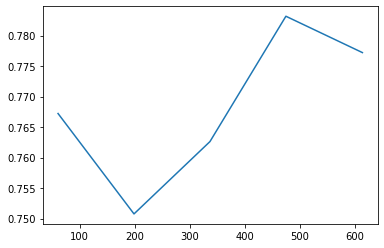

In [ ]:
#линейная
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC

train_sizes, train_scores, valid_scores = learning_curve(SVC(kernel='linear'), X, Y)
plt.plot(train_sizes, np.mean(train_scores, axis=1))

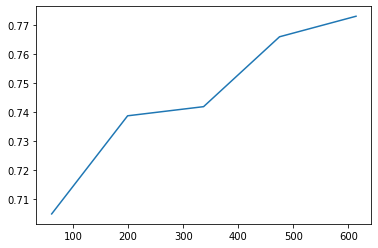

In [ ]:
#Гаусс
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC

train_sizes, train_scores, valid_scores = learning_curve(SVC(kernel='rbf'), X, Y)
plt.plot(train_sizes, np.mean(train_scores, axis=1))

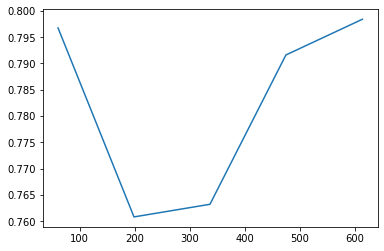

In [ ]:
#KNeighborsClassifier
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(KNeighborsClassifier(n_neighbors=5), X, Y)
plt.plot(train_sizes, np.mean(train_scores, axis=1))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

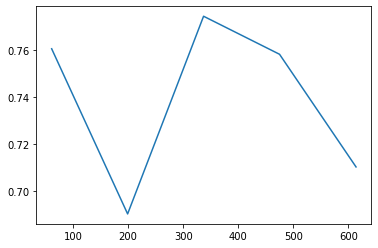

In [ ]:
#MLPClassifier
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(MLPClassifier(), X, Y)
plt.plot(train_sizes, np.mean(train_scores, axis=1))

Повторите полностью анализ для другой задачи - распознавание вида ириса по параметрам растения (можно использовать метод sklearn.datasets.load_iris()).

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
x_iris = iris.data
x_iris = pd.DataFrame(x_iris)
x_iris

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
y_iris = iris.target
y_iris = pd.DataFrame(y_iris)
y_iris

,0
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_iris, y_iris, test_size=0.2, random_state=True)

In [ ]:
# метод опорных векторов с гаусовым ядром
from sklearn import svm
model_svc = svm.SVC()
model_svc.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [ ]:
y_pred3 = model_svc.predict(x_test)

In [ ]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred3)

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

Text(0.5, 15.0, 'Предсказанные значения')

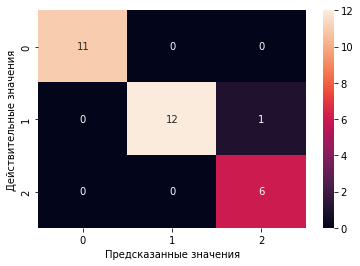

In [ ]:
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_pred3)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

In [ ]:
metrics.accuracy_score(y_test, y_pred3)

0.9666666666666667

In [ ]:
metrics.precision_score(y_test, y_pred3, average='macro')

0.9523809523809524

In [ ]:
metrics.recall_score(y_test, y_pred3, average='macro')

0.9743589743589745

In [ ]:
#многослойный перцептрон
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier()
clf.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier()

In [ ]:
y_pred5 = clf.predict(x_test)

In [ ]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred5)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]])

Text(0.5, 15.0, 'Предсказанные значения')

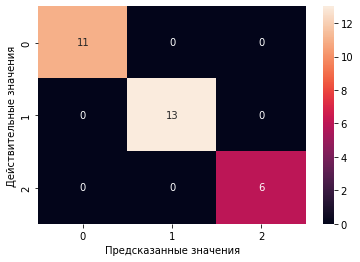

In [ ]:
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_pred5)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

In [ ]:
metrics.accuracy_score(y_test, y_pred5)

1.0

In [ ]:
metrics.precision_score(y_test, y_pred5, average='macro')

1.0

In [ ]:
metrics.recall_score(y_test, y_pred3, average='macro')

0.9743589743589745

Сравнивая раздичные метрики, можно сделать вывод, что модель многослойного перцептрона лучше.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

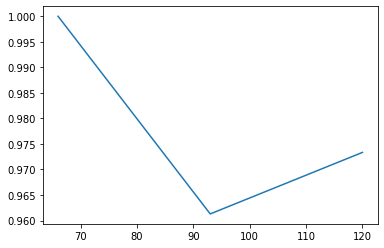

In [ ]:
#гаусса
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC

train_sizes, train_scores, valid_scores = learning_curve(SVC(kernel='rbf'), x_iris, y_iris)
plt.plot(train_sizes, np.mean(train_scores, axis=1))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iteratio

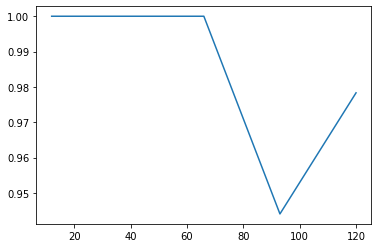

In [ ]:
#MLPClassifier
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(MLPClassifier(), x_iris, y_iris)
plt.plot(train_sizes, np.mean(train_scores, axis=1))